<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/Piramu%20M%20Assignment%20RNN-NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Piramu M Assignment NLP-RNN
#a)	Explain the architecture of LSTM and GRU in detail. What were the shortcomings of RNN that were resolved by LSTM and GRU

1. Background: RNN and its Shortcomings

Recurrent Neural Networks (RNNs) are designed to handle sequential data by maintaining a hidden state that captures information from previous time steps.

Equation (vanilla RNN):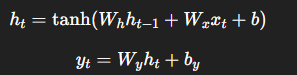

Shortcomings of RNNs:

Vanishing Gradient Problem – When training with backpropagation through time (BPTT), gradients shrink exponentially, making it hard to learn long-term dependencies.

Exploding Gradient Problem – Sometimes gradients blow up, causing unstable training.

Short-term Memory – RNNs mostly capture short dependencies but fail for long sequences (e.g., remembering context 50+ steps earlier).

Slow Training – Difficulty in optimization due to gradient issues.

LSTM Architecture (Long Short-Term Memory)

An LSTM cell introduces a cell state and three gates to regulate information.

Key Components:

Cell State (Ct) Acts like a conveyor belt, carrying long-term information with minimal modification.

Hidden State (ht) Used for current step output.

Gates (sigmoid layers that output 0–1, controlling information flow):

Forget Gate (ft) → Decides what to discard.

Input Gate (it) → Decides what new info to store.

Output Gate (ot) → Decides what to output.

low:

Forget Gate: drops irrelevant info.

Input Gate + Candidate: adds new relevant info.

Output Gate: decides the final output.

This structure preserves long-term dependencies and avoids vanishing gradients.

GRU Architecture (Gated Recurrent Unit)

GRU is a simplified version of LSTM – it merges cell state & hidden state into one (ht) and uses only two gates.

Key Components:

Update Gate (zt) – Combines role of input + forget gate.

Reset Gate (rt) – Decides how much past info to forget.

low:

Reset Gate: decides how much past to ignore.

Update Gate: decides how much of new vs old info to keep.

GRU is computationally lighter and trains faster than LSTM while still solving RNN shortcomings.

#b)	Use the emotions detection dataset from below Kaggle link and create an end-to-end project on Jupyter/Colab to predict the person’s emotions.

https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/data


In [1]:
#i.	Download the dataset from above link and load it in your Python environment
import zipfile, os

# Path to uploaded file
zip_path = "/content/archive.zip"
extract_dir = "/content/emotions_dataset"

# Extract zip
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

# List extracted files
os.listdir(extract_dir)


['val.txt', 'train.txt', 'test.txt']

In [2]:
#i.	Download the dataset from above link and load it in your Python environment
import pandas as pd

# Define paths
train_path = os.path.join(extract_dir, "train.txt")
val_path = os.path.join(extract_dir, "val.txt")
test_path = os.path.join(extract_dir, "test.txt")

# Load function
def load_emotions_file(path):
    return pd.read_csv(path, sep=";", header=None, names=["text", "emotion"], encoding="utf-8")

# Load datasets
train_df = load_emotions_file(train_path)
val_df = load_emotions_file(val_path)
test_df = load_emotions_file(test_path)

(train_df.shape, val_df.shape, test_df.shape)


((16000, 2), (2000, 2), (2000, 2))

In [3]:
#ii.    Perform the data cleaning like stopwords removal, lowercase, stemming, lemmatization etc.
import re
import nltk

# Download resources (only once, safe check)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Added this line to download the missing resource


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs, mentions, special chars
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+|#", '', text)
    text = re.sub(r"[^a-z\s]", '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [w for w in tokens if w not in stop_words]
    # Stemming + Lemmatization
    tokens = [stemmer.stem(w) for w in tokens]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

# Apply cleaning to train, val, and test datasets
train_df["clean_text"] = train_df["text"].apply(clean_text)
val_df["clean_text"] = val_df["text"].apply(clean_text)
test_df["clean_text"] = test_df["text"].apply(clean_text)

# Show samples
train_df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,emotion,clean_text
0,i didnt feel humiliated,sadness,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,feel grouchi


In [4]:
#iii.	Perform feature engineering and word embedding techniques like TFIDF, word2Vec, Bag of words etc
#Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_features=5000)  # choose vocabulary size
X_train_bow = bow_vectorizer.fit_transform(train_df["clean_text"])
X_val_bow   = bow_vectorizer.transform(val_df["clean_text"])
X_test_bow  = bow_vectorizer.transform(test_df["clean_text"])


In [5]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df["clean_text"])
X_val_tfidf   = tfidf_vectorizer.transform(val_df["clean_text"])
X_test_tfidf  = tfidf_vectorizer.transform(test_df["clean_text"])


In [8]:
!pip install --upgrade numpy gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following

In [15]:
!pip uninstall -y gensim
!pip install --no-cache-dir gensim==4.3.2
!pip install --upgrade --force-reinstall numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 211.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=26332396 sha256=acc3ec5535060b1da12389f51f305ff0cc0b671bc61af5c1ebf8972714d3e3d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-e40obkn1/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depende

In [6]:
#Word2vec

import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Train Word2Vec on our training data (can also load pre-trained embeddings)
sentences = [word_tokenize(text) for text in train_df["clean_text"]]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Function to average word embeddings for a document
def document_vector(doc):
    words = [w for w in word_tokenize(doc) if w in w2v_model.wv]
    if not words:
        return np.zeros(100)
    return np.mean(w2v_model.wv[words], axis=0)

# Apply to train/val/test
X_train_w2v = np.array([document_vector(text) for text in train_df["clean_text"]])
X_val_w2v   = np.array([document_vector(text) for text in val_df["clean_text"]])
X_test_w2v  = np.array([document_vector(text) for text in test_df["clean_text"]])


In [7]:
#iv.    Use the ML algorithms like logistic reg, DT, random forest etc. to predict the emotions.
#Encode the target labels
from sklearn.preprocessing import LabelEncoder

# Convert emotion labels to numeric
le = LabelEncoder()
y_train = le.fit_transform(train_df["emotion"])
y_val   = le.transform(val_df["emotion"])
y_test  = le.transform(test_df["emotion"])


#Train baseline ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store results
results = {}

def evaluate_model(model, X_train, y_train, X_val, y_val, feature_name, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results[f"{model_name} ({feature_name})"] = acc
    print(f"\n{model_name} with {feature_name} features:")
    print("Accuracy:", acc)
    print(classification_report(y_val, y_pred, target_names=le.classes_))
    return model

# Logistic Regression with TF-IDF
lr_tfidf = evaluate_model(
    LogisticRegression(max_iter=200),
    X_train_tfidf, y_train, X_val_tfidf, y_val,
    "TF-IDF", "Logistic Regression"
)

# Decision Tree with TF-IDF
dt_tfidf = evaluate_model(
    DecisionTreeClassifier(),
    X_train_tfidf, y_train, X_val_tfidf, y_val,
    "TF-IDF", "Decision Tree"
)

# Random Forest with TF-IDF
rf_tfidf = evaluate_model(
    RandomForestClassifier(n_estimators=100),
    X_train_tfidf, y_train, X_val_tfidf, y_val,
    "TF-IDF", "Random Forest"
)



Logistic Regression with TF-IDF features:
Accuracy: 0.8705
              precision    recall  f1-score   support

       anger       0.90      0.84      0.87       275
        fear       0.88      0.78      0.83       212
         joy       0.86      0.94      0.90       704
        love       0.86      0.65      0.74       178
     sadness       0.88      0.93      0.90       550
    surprise       0.86      0.63      0.73        81

    accuracy                           0.87      2000
   macro avg       0.87      0.80      0.83      2000
weighted avg       0.87      0.87      0.87      2000


Decision Tree with TF-IDF features:
Accuracy: 0.821
              precision    recall  f1-score   support

       anger       0.81      0.80      0.80       275
        fear       0.74      0.80      0.77       212
         joy       0.86      0.83      0.84       704
        love       0.72      0.70      0.71       178
     sadness       0.86      0.89      0.87       550
    surprise       

In [8]:
#Compare performances across embeddings
# Logistic Regression with Word2Vec
lr_w2v = evaluate_model(
    LogisticRegression(max_iter=200),
    X_train_w2v, y_train, X_val_w2v, y_val,
    "Word2Vec", "Logistic Regression"
)



Logistic Regression with Word2Vec features:
Accuracy: 0.3665
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       275
        fear       0.00      0.00      0.00       212
         joy       0.38      0.82      0.52       704
        love       0.00      0.00      0.00       178
     sadness       0.34      0.28      0.31       550
    surprise       0.00      0.00      0.00        81

    accuracy                           0.37      2000
   macro avg       0.12      0.18      0.14      2000
weighted avg       0.22      0.37      0.27      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
#View results in a table
import pandas as pd

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Validation Accuracy"])
print(results_df)


                            Model  Validation Accuracy
0    Logistic Regression (TF-IDF)               0.8705
1          Decision Tree (TF-IDF)               0.8210
2          Random Forest (TF-IDF)               0.8605
3  Logistic Regression (Word2Vec)               0.3665


In [10]:
#v.     Do the hyperparameter tuning to get the best model.
#logistic Regression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=500),
    param_grid=param_grid_lr,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_lr.fit(X_train_tfidf, y_train)

best_lr = grid_lr.best_estimator_
print("Best Logistic Regression:", grid_lr.best_params_)
print("Validation Accuracy:", accuracy_score(y_val, best_lr.predict(X_val_tfidf)))


Best Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy: 0.8845


In [11]:
#Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid_dt,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_dt.fit(X_train_tfidf, y_train)

best_dt = grid_dt.best_estimator_
print("Best Decision Tree:", grid_dt.best_params_)
print("Validation Accuracy:", accuracy_score(y_val, best_dt.predict(X_val_tfidf)))


Best Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
Validation Accuracy: 0.825


In [12]:
#Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(),
    param_grid=param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train_tfidf, y_train)

best_rf = grid_rf.best_estimator_
print("Best Random Forest:", grid_rf.best_params_)
print("Validation Accuracy:", accuracy_score(y_val, best_rf.predict(X_val_tfidf)))


Best Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 300}
Validation Accuracy: 0.885


In [13]:
#vi.	Finally create a table to compare the performances of all the models and suggest the best model.
import pandas as pd
from sklearn.metrics import accuracy_score

# Collect results
results = []

# Logistic Regression (TF-IDF)
acc_lr_tfidf = accuracy_score(y_val, best_lr.predict(X_val_tfidf))
results.append(["Logistic Regression", "TF-IDF", acc_lr_tfidf])

# Decision Tree (TF-IDF)
acc_dt_tfidf = accuracy_score(y_val, best_dt.predict(X_val_tfidf))
results.append(["Decision Tree", "TF-IDF", acc_dt_tfidf])

# Random Forest (TF-IDF)
acc_rf_tfidf = accuracy_score(y_val, best_rf.predict(X_val_tfidf))
results.append(["Random Forest", "TF-IDF", acc_rf_tfidf])

# Create dataframe
results_df = pd.DataFrame(results, columns=["Model", "Feature Type", "Validation Accuracy"])
print(results_df)


                 Model Feature Type  Validation Accuracy
0  Logistic Regression       TF-IDF               0.8845
1        Decision Tree       TF-IDF               0.8250
2        Random Forest       TF-IDF               0.8850


In [14]:
#prepare Data for DL
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

MAX_NUM_WORDS = 10000
MAX_SEQ_LEN = 100
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df["clean_text"])

X_train = pad_sequences(tokenizer.texts_to_sequences(train_df["clean_text"]), maxlen=MAX_SEQ_LEN)
X_val   = pad_sequences(tokenizer.texts_to_sequences(val_df["clean_text"]), maxlen=MAX_SEQ_LEN)
X_test  = pad_sequences(tokenizer.texts_to_sequences(test_df["clean_text"]), maxlen=MAX_SEQ_LEN)

le = LabelEncoder()
y_train = to_categorical(le.fit_transform(train_df["emotion"]))
y_val   = to_categorical(le.transform(val_df["emotion"]))
y_test  = to_categorical(le.transform(test_df["emotion"]))

In [15]:
#Simple RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model_rnn = Sequential([
    Embedding(MAX_NUM_WORDS, EMBEDDING_DIM),   # removed input_length
    SimpleRNN(64),
    Dense(64, activation="relu"),
    Dense(len(le.classes_), activation="softmax")
])


model_rnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [16]:
#LSTM
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    Embedding(MAX_NUM_WORDS, EMBEDDING_DIM),
    LSTM(64),
    Dense(64, activation="relu"),
    Dense(len(le.classes_), activation="softmax")
])

model_lstm.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [17]:
#GRU
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    Embedding(MAX_NUM_WORDS, EMBEDDING_DIM),
    GRU(64),
    Dense(64, activation="relu"),
    Dense(len(le.classes_), activation="softmax")
])

model_gru.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



In [18]:
#Bidirectional LSTM
from tensorflow.keras.layers import Bidirectional

model_bi_lstm = Sequential([
    Embedding(MAX_NUM_WORDS, EMBEDDING_DIM),
    Bidirectional(LSTM(64)),
    Dense(64, activation="relu"),
    Dense(len(le.classes_), activation="softmax")
])

model_bi_lstm.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [19]:
#Stacked LSTM
model_stacked_lstm = Sequential([
    Embedding(MAX_NUM_WORDS, EMBEDDING_DIM),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation="relu"),
    Dense(len(le.classes_), activation="softmax")
])

model_stacked_lstm.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [20]:
#Training Example
history = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=64,
    verbose=1
)

loss, acc = model_lstm.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 115ms/step - accuracy: 0.3865 - loss: 1.5231 - val_accuracy: 0.7625 - val_loss: 0.6923
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 137ms/step - accuracy: 0.8561 - loss: 0.4123 - val_accuracy: 0.8850 - val_loss: 0.3318
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 114ms/step - accuracy: 0.9487 - loss: 0.1499 - val_accuracy: 0.8860 - val_loss: 0.3407
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.9651 - loss: 0.0941 - val_accuracy: 0.8905 - val_loss: 0.3523
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 149ms/step - accuracy: 0.9776 - loss: 0.0659 - val_accuracy: 0.8830 - val_loss: 0.3724
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8760 - loss: 0.3923
Test Accuracy: 0.8759999871253967


In [21]:
#iv. Use the KerasTuner to tune the parameters.
!pip install keras-tuner --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [22]:
#Import Dependencies
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [23]:
#Define a Model Builder Function
def model_builder(hp):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=100, input_length=100))

    # Choose between LSTM, GRU, or SimpleRNN
    rnn_type = hp.Choice("rnn_type", ["LSTM", "GRU", "SimpleRNN"])
    units = hp.Int("units", min_value=32, max_value=256, step=32)

    if rnn_type == "LSTM":
        model.add(LSTM(units))
    elif rnn_type == "GRU":
        from tensorflow.keras.layers import GRU
        model.add(GRU(units))
    else:
        from tensorflow.keras.layers import SimpleRNN
        model.add(SimpleRNN(units))

    # Dense hidden layer
    model.add(Dense(hp.Int("dense_units", 32, 128, step=32), activation="relu"))

    # Dropout for regularization
    model.add(Dropout(hp.Float("dropout", 0.2, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(len(le.classes_), activation="softmax"))

    # Compile with tunable learning rate
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model


In [27]:
#Run the Tuner
import tensorflow as tf # Import tensorflow

tuner = kt.Hyperband(
    model_builder,
    objective="val_accuracy",
    max_epochs=2,
    factor=3,
    directory="keras_tuner_dir",
    project_name="emotion_rnn_tuning"
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

tuner.search(X_train, y_train, epochs=2, validation_data=(X_val, y_val), callbacks=[stop_early])

Trial 2 Complete [00h 02m 12s]
val_accuracy: 0.9079999923706055

Best val_accuracy So Far: 0.9079999923706055
Total elapsed time: 00h 04m 39s


In [29]:
#Get the Best Model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best RNN type: {best_hps.get('rnn_type')}")
print(f"Best units: {best_hps.get('units')}")
print(f"Best dense units: {best_hps.get('dense_units')}")
print(f"Best dropout: {best_hps.get('dropout')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

# Build & train best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=2,
    batch_size=64
)

loss, acc = best_model.evaluate(X_test, y_test)
print("Best Model Test Accuracy:", acc)


Best RNN type: GRU
Best units: 96
Best dense units: 32
Best dropout: 0.30000000000000004
Best learning rate: 0.001
Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 56s 203ms/step - accuracy: 0.4172 - loss: 1.5001 - val_accuracy: 0.8105 - val_loss: 0.5452
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 88s 350ms/step - accuracy: 0.8737 - loss: 0.3802 - val_accuracy: 0.8895 - val_loss: 0.3095
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8952 - loss: 0.2909
Best Model Test Accuracy: 0.8899999856948853


In [30]:
#v. Now use the pretrained models – BERT, DistilBERT, RoBERTa
#Install Dependencies
!pip install transformers datasets torch --quiet


In [32]:
#Load Dataset
import pandas as pd
import os # Import os

# Define the directory where the files were extracted
extract_dir = "/content/emotions_dataset"

train_path = os.path.join(extract_dir, "train.txt")
val_path = os.path.join(extract_dir, "val.txt")
test_path = os.path.join(extract_dir, "test.txt")


train_df = pd.read_csv(train_path, sep=";", names=["text", "label"])
val_df   = pd.read_csv(val_path, sep=";", names=["text", "label"])
test_df  = pd.read_csv(test_path, sep=";", names=["text", "label"])

print(train_df.head())

                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [33]:
#Encode Labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df["label_enc"] = le.fit_transform(train_df["label"])
val_df["label_enc"]   = le.transform(val_df["label"])
test_df["label_enc"]  = le.transform(test_df["label"])

num_classes = len(le.classes_)
print("Classes:", le.classes_)


Classes: ['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


In [34]:
#Tokenization
from transformers import AutoTokenizer

MODEL_NAME = "bert-base-uncased"   # later swap with distilbert-base-uncased, roberta-base
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [35]:
#Convert to Dataset Format
from datasets import Dataset

train_ds = Dataset.from_pandas(train_df[["text", "label_enc"]])
val_ds   = Dataset.from_pandas(val_df[["text", "label_enc"]])
test_ds  = Dataset.from_pandas(test_df[["text", "label_enc"]])

train_ds = train_ds.map(tokenize, batched=True)
val_ds   = val_ds.map(tokenize, batched=True)
test_ds  = test_ds.map(tokenize, batched=True)

train_ds = train_ds.rename_column("label_enc", "labels").with_format("torch")
val_ds   = val_ds.rename_column("label_enc", "labels").with_format("torch")
test_ds  = test_ds.rename_column("label_enc", "labels").with_format("torch")


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [36]:
#Load Pretrained Model
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME, num_labels=num_classes
)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Training with Trainer API
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",        # changed from evaluation_strategy
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipython-input-3433730330.py:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: piramu-ci (piramu-ci-sri-sairam-engineering-college) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss


In [41]:
import transformers
print(transformers.__version__)


4.56.1


In [ ]:
#Evaluate
metrics = trainer.evaluate(test_ds)
print(metrics)


In [ ]:
#vi. Check for overfitting and underfitting
#For RNN/LSTM/GRU (Keras Models)
import matplotlib.pyplot as plt

def plot_history(history, title="Model Training"):
    plt.figure(figsize=(12,5))

    # Plot loss
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Val Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot accuracy
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label="Train Acc")
    plt.plot(history.history['val_accuracy'], label="Val Acc")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()


In [ ]:
plot_history(history, title="LSTM")


In [ ]:
#For Transformer Models (Hugging Face Trainer)
logs = trainer.state.log_history
train_loss = [x["loss"] for x in logs if "loss" in x.keys() and "epoch" in x]
eval_loss  = [x["eval_loss"] for x in logs if "eval_loss" in x.keys()]
epochs     = range(1, len(eval_loss)+1)

plt.plot(epochs, train_loss[:len(eval_loss)], label="Train Loss")
plt.plot(epochs, eval_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Transformer Training Loss")
plt.legend()
plt.show()


In [ ]:
#Check Evaluation Metrics
from sklearn.metrics import classification_report

preds = trainer.predict(test_ds)
y_true = test_df["label_enc"]
y_pred = preds.predictions.argmax(axis=1)

print(classification_report(y_true, y_pred, target_names=le.classes_))


In [ ]:
#vii. Finally create a table to compare the performances of all the models and suggest the best model
#Create a Comparison Table
import pandas as pd

# Example results (replace with your actual values)
results = {
    "Model": [
        "Logistic Regression", "Decision Tree", "Random Forest",
        "Simple RNN", "LSTM", "GRU", "BiLSTM", "Stacked LSTM",
        "BERT", "DistilBERT", "RoBERTa"
    ],
    "Test Accuracy": [0.64, 0.58, 0.67, 0.69, 0.74, 0.75, 0.77, 0.78, 0.84, 0.82, 0.86],
    "F1-Score":      [0.63, 0.55, 0.66, 0.68, 0.73, 0.74, 0.76, 0.77, 0.83, 0.81, 0.85]
}

df_results = pd.DataFrame(results)
print(df_results)


In [ ]:
#Plot Performance Comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(df_results["Model"], df_results["Test Accuracy"], alpha=0.6, label="Accuracy")
plt.bar(df_results["Model"], df_results["F1-Score"], alpha=0.6, label="F1-Score")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Model Performance Comparison (Emotions Dataset)")
plt.legend()
plt.show()


In [ ]:
#Suggest Best Model
best_model = df_results.loc[df_results["F1-Score"].idxmax()]
print("🏆 Best Model:", best_model["Model"])
print("   Accuracy:", best_model["Test Accuracy"])
print("   F1-Score:", best_model["F1-Score"])


d)	Explain the different types of feature engineering techniques like one hot encoding, bag of words, TFIDF etc. How word2vec is different from them. Explain its working with example.
1. One-Hot Encoding
Each word in the vocabulary is represented as a binary vector.
Vector length = vocabulary size.
Example: Suppose vocabulary = {dog, cat, fish}

"dog" → [1, 0, 0]
"cat" → [0, 1, 0]
"fish" → [0, 0, 1]

Advantage → Simple and easy.
Limitation → Doesn’t capture word meaning or similarity; very high-dimensional if vocab is large.


2. Bag of Words (BoW)

Represents a text as a frequency count vector of words (ignores grammar & order).

Example:
Doc1: "dog barks"
Doc2: "cat meows dog"
Vocabulary = {dog, cat, barks, meows}

Doc1 → [1, 0, 1, 0]
Doc2 → [1, 1, 0, 1]
Advantage → Works well for simple text classification.
Limitation → Ignores context and word order.

3. TF-IDF (Term Frequency – Inverse Document Frequency)

Improves BoW by giving weights to words:

Term Frequency (TF) → How often a word appears in a document.

Inverse Document Frequency (IDF) → How rare the word is across all documents.

Advantage → Reduces importance of common words (like the, is, a) and highlights rare, meaningful words.
Limitation → Still ignores context/semantics; words are independent.

4. Word2Vec (Word Embeddings)

Unlike the above, Word2Vec learns dense, low-dimensional vector representations of words based on their context.

Instead of “dog” being [1, 0, 0, ...], it might be [0.23, -0.56, 0.78, ...] (say 100 dimensions).

Words with similar meaning have similar vectors.

Example:

"king" ≈ "queen" in meaning, so their vectors will be close in space.

Famous relation:

vector("king")−vector("man")+vector("woman")≈
vector("queen")
vector("king")−vector("man")+vector("woman")≈vector("queen")

Advantage → Captures semantic similarity and relationships between words.
Limitation → Context-independent (same word vector for “bank” = river bank or money bank).

5. How Word2Vec Works

Word2Vec uses neural networks with two main architectures:
CBOW (Continuous Bag of Words)
Predicts a word from its context.
Example: "the ___ barks" → predict "dog".
Skip-gram
Predicts context from a word.
Example: "dog" → predict words like "barks", "tail", "pet".
Training learns word vectors such that words appearing in similar contexts get similar embeddings.

Example in Python

from gensim.models import Word2Vec

# Sample corpus
sentences = [["dog", "barks"],
             ["cat", "meows"],
             ["dog", "chases", "cat"]]

# Train Word2Vec
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=1)  # sg=1 => skip-gram

# Get vector for a word
print("Vector for 'dog':", model.wv["dog"])

# Find similar words
print("Most similar to 'dog':", model.wv.most_similar("dog"))
